In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.MNIST('', train=True, download=True, transform=transform)
testset = datasets.MNIST('', train=False, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True)
test_loader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=True)

### Fully connected network

In [4]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

class LinearNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,64)
        self.fc2 = nn.Linear(64,64)
        self.fc3 = nn.Linear(64,64)
        self.fc4 = nn.Linear(64,10)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
        
net = LinearNet()
optimizer = optim.Adam(net.parameters(), lr=0.001)
print(net)

LinearNet(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [8]:
epochs = 3
for epoch in range(epochs):
    for batch_idx, (X, y) in enumerate(train_loader):
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()

        if batch_idx % 500 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(X), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.286768
Train Epoch: 0 [2000/60000 (3%)]	Loss: 0.394023
Train Epoch: 0 [4000/60000 (7%)]	Loss: 0.415429
Train Epoch: 0 [6000/60000 (10%)]	Loss: 0.356281
Train Epoch: 0 [8000/60000 (13%)]	Loss: 0.226125
Train Epoch: 0 [10000/60000 (17%)]	Loss: 0.252468
Train Epoch: 0 [12000/60000 (20%)]	Loss: 0.039202
Train Epoch: 0 [14000/60000 (23%)]	Loss: 0.029337
Train Epoch: 0 [16000/60000 (27%)]	Loss: 1.186294
Train Epoch: 0 [18000/60000 (30%)]	Loss: 0.023177
Train Epoch: 0 [20000/60000 (33%)]	Loss: 0.163831
Train Epoch: 0 [22000/60000 (37%)]	Loss: 0.547942
Train Epoch: 0 [24000/60000 (40%)]	Loss: 0.038102
Train Epoch: 0 [26000/60000 (43%)]	Loss: 0.123143
Train Epoch: 0 [28000/60000 (47%)]	Loss: 0.259829
Train Epoch: 0 [30000/60000 (50%)]	Loss: 0.026426
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.282001
Train Epoch: 0 [34000/60000 (57%)]	Loss: 0.006606
Train Epoch: 0 [36000/60000 (60%)]	Loss: 0.139225
Train Epoch: 0 [38000/60000 (63%)]	Loss: 0.126994
Train Epoch

In [9]:
correct = 0
test_loss = 0
with torch.no_grad():
    for X, y in test_loader:
        output = net(X.view(-1,28*28))
        pred = output.argmax(dim=1, keepdim=True)
        test_loss += F.nll_loss(output, y, reduction='sum').item()
        correct += pred.eq(y.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))



Test set: Average loss: 0.0964, Accuracy: 9698/10000 (97%)



In [1]:
X, _ = next(iter(train_loader))
plt.imshow(X[0].view(28,28))
plt.show()
print(f"Classifier says: {torch.argmax(net(X[0].view(-1,28*28)))}")

NameError: name 'train_loader' is not defined

### Convolutional network

In [ ]:
#train_loader = torch.utils.data.DataLoader(trainset, batch_size=1000, shuffle=True)
#test_loader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=True)

In [13]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(32*3*32*3, 128)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self,x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        
        return F.log_softmax(x, dim=1)
    
        
net = ConvNet()
optimizer = optim.Adam(net.parameters(), lr=0.001)
print(net)

ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [15]:
epochs = 3
for epoch in range(epochs):
    for batch_idx, (X, y) in enumerate(train_loader):
        net.zero_grad()
        output = net(X.view(-1, 1, 28,28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
        
        if batch_idx % 200 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(X), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

Train Epoch: 2 [0/60000 (0%)]	Loss: 2.296376
Train Epoch: 2 [2000/60000 (3%)]	Loss: 0.518402
Train Epoch: 2 [4000/60000 (7%)]	Loss: 0.261146
Train Epoch: 2 [6000/60000 (10%)]	Loss: 0.124958
Train Epoch: 2 [8000/60000 (13%)]	Loss: 0.204115
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.099183
Train Epoch: 2 [12000/60000 (20%)]	Loss: 0.275552
Train Epoch: 2 [14000/60000 (23%)]	Loss: 0.212750
Train Epoch: 2 [16000/60000 (27%)]	Loss: 0.242164
Train Epoch: 2 [18000/60000 (30%)]	Loss: 0.322103
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.019931
Train Epoch: 2 [22000/60000 (37%)]	Loss: 0.004057
Train Epoch: 2 [24000/60000 (40%)]	Loss: 0.427906
Train Epoch: 2 [26000/60000 (43%)]	Loss: 1.276977
Train Epoch: 2 [28000/60000 (47%)]	Loss: 0.653371
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.002903
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.381754
Train Epoch: 2 [34000/60000 (57%)]	Loss: 0.001100
Train Epoch: 2 [36000/60000 (60%)]	Loss: 0.001487
Train Epoch: 2 [38000/60000 (63%)]	Loss: 0.265080
Train Epoch

In [16]:
correct = 0
test_loss = 0
with torch.no_grad():
    for X, y in test_loader:
        output = net(X.view(-1,1,28,28))
        pred = output.argmax(dim=1, keepdim=True)
        test_loss += F.nll_loss(output, y, reduction='sum').item()
        correct += pred.eq(y.view_as(pred)).sum().item()

test_loss /= len(test_loader.dataset)

print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))



Test set: Average loss: 0.0808, Accuracy: 9778/10000 (98%)



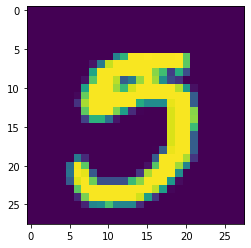

Classifier says: 5


In [32]:
X, _ = next(iter(train_loader))
plt.imshow(X[0].view(28,28))
plt.show()
print(f"Classifier says: {torch.argmax(net(X[0].view(-1,1,28,28)))}")

### Bayesian fully connected net

In [41]:
import sys
sys.path.append("./BayesianNeuralNetworks")
import bnn.nn as nn
#from bnn.nn import BayesianNetworkModule, NormalConv2d, NormalLinear, KLDivergence, Entropy

In [42]:
class BayesConvNet(BayesianNetworkModule):
    def __init__(self, samples=10):
        super(BayesConvNet, self).__init__(28*28, 10, samples)
        
        self.fc1 = nn.NormalLinear(28*28,64)
        self.fc2 = nn.NormalLinear(64,64)
        self.fc3 = nn.NormalLinear(64,64)
        self.fc4 = nn.NormalLinear(64,10)
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
    
        
net = BayesConvNet()
optimizer = optim.Adam(net.parameters(), lr=0.001)
print(net)

BayesConvNet(
  (fc1): NormalLinear(
    (weight): WeightNormal()
    (bias): WeightNormal()
  )
  (fc2): NormalLinear(
    (weight): WeightNormal()
    (bias): WeightNormal()
  )
  (fc3): NormalLinear(
    (weight): WeightNormal()
    (bias): WeightNormal()
  )
  (fc4): NormalLinear(
    (weight): WeightNormal()
    (bias): WeightNormal()
  )
)


In [ ]:
epochs = 3
for epoch in range(epochs):
    for batch_idx, (X, y) in enumerate(train_loader):
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()

        if batch_idx % 500 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(X), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

### Bayesian convolutional network